## Import basic libraries

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

## Read/clean dataset

In [49]:
df = pd.read_csv(r'C:\Users\sriha\OneDrive\Desktop\DS\My work\loan-repayment\loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [50]:
df.shape

(9578, 14)

In [51]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

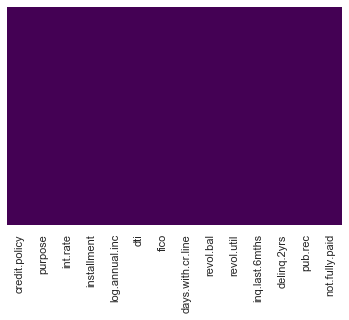

In [52]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

This dataset is already clean, but this is the general procedure to begin cleaning the dataset. The above plot would highlight any null values present in the dataset. Following this, we can make a decision to either drop the rows with null values, or to fill in the null values. The choice to do one or the other depends on the situation. Take a look at the 'titanic' repository for an example.  

## Exploratory Data Analysis

Text(0, 0.5, 'Count')

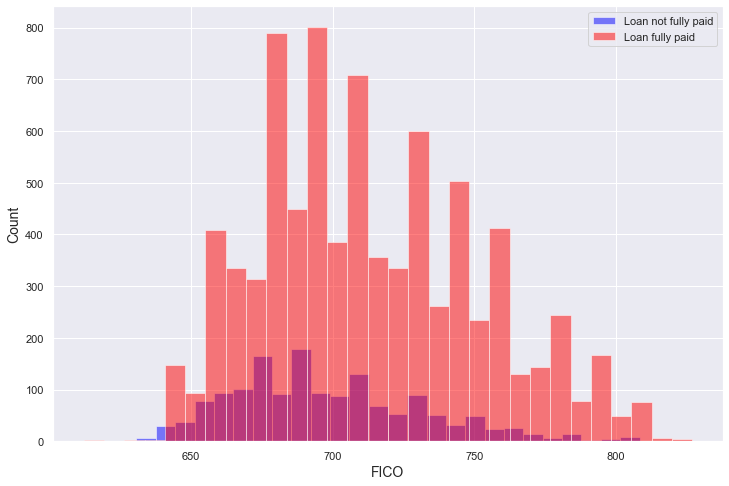

In [75]:
fig,ax=plt.subplots(figsize=(12,8))
df[df['not.fully.paid'] == 1]['fico'].hist(color='blue', alpha=0.5, bins=30, label='Loan not fully paid')
df[df['not.fully.paid'] == 0]['fico'].hist(color='red', alpha=0.5, bins=30, label='Loan fully paid')
ax.legend()
plt.xlabel('FICO', fontsize=14)
plt.ylabel('Count', fontsize=14)

We can see that most people are actaully paying back the loans fully. The distribution of people paying vs. not paying back the loans also looks to be similar. 

Text(0, 0.5, 'Count')

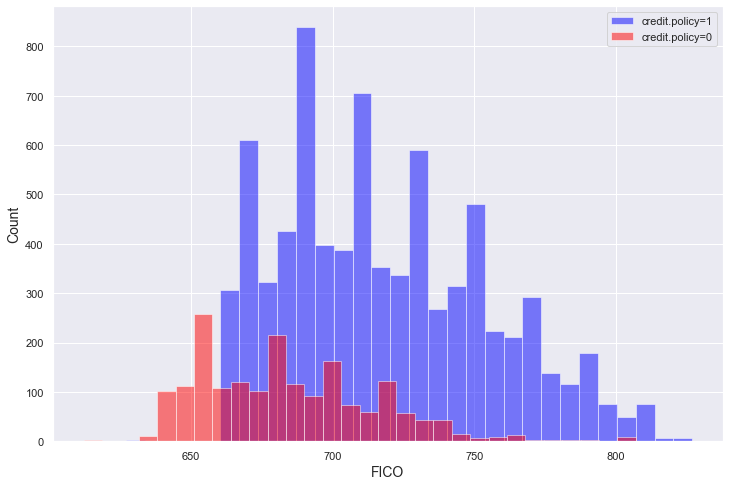

In [74]:
fig,ax=plt.subplots(figsize=(12,8))
df[df['credit.policy'] == 1]['fico'].hist(color='blue', alpha=0.5, bins=30, label='credit.policy=1')
df[df['credit.policy'] == 0]['fico'].hist(color='red', alpha=0.5, bins=30, label='credit.policy=0')
ax.legend()
plt.xlabel('FICO', fontsize=14)
plt.ylabel('Count', fontsize=14)

We can get a lot of information from this plot. 
- First off, our dataset has a lot more people who DO meet the Lending Club credit policy. 
- Second, people who do not meet the creditpolicy tend to have a lower FICO score. People with a FICO score lower than around 660 automatically do not meet the credit policy.

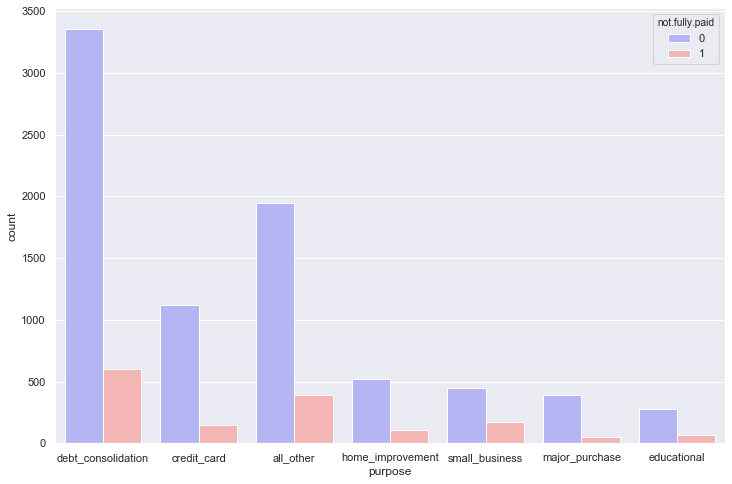

In [63]:
plt.figure(figsize=(12,8))
sns.countplot(x='purpose', hue='not.fully.paid', data=df, palette='bwr')

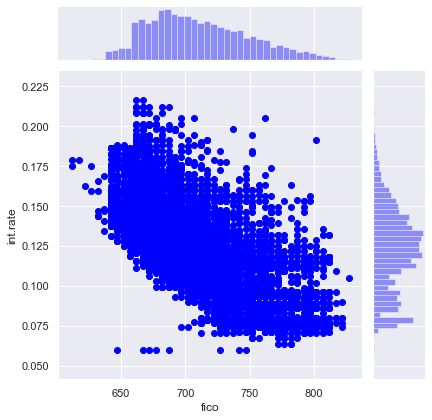

In [76]:
sns.jointplot(x='fico', y='int.rate', data=df, color='blue')

This is just confirmation of what we expect. People with higher FICO scores are likely to get lower interest rates. 

C:\Users\sriha\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\sriha\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


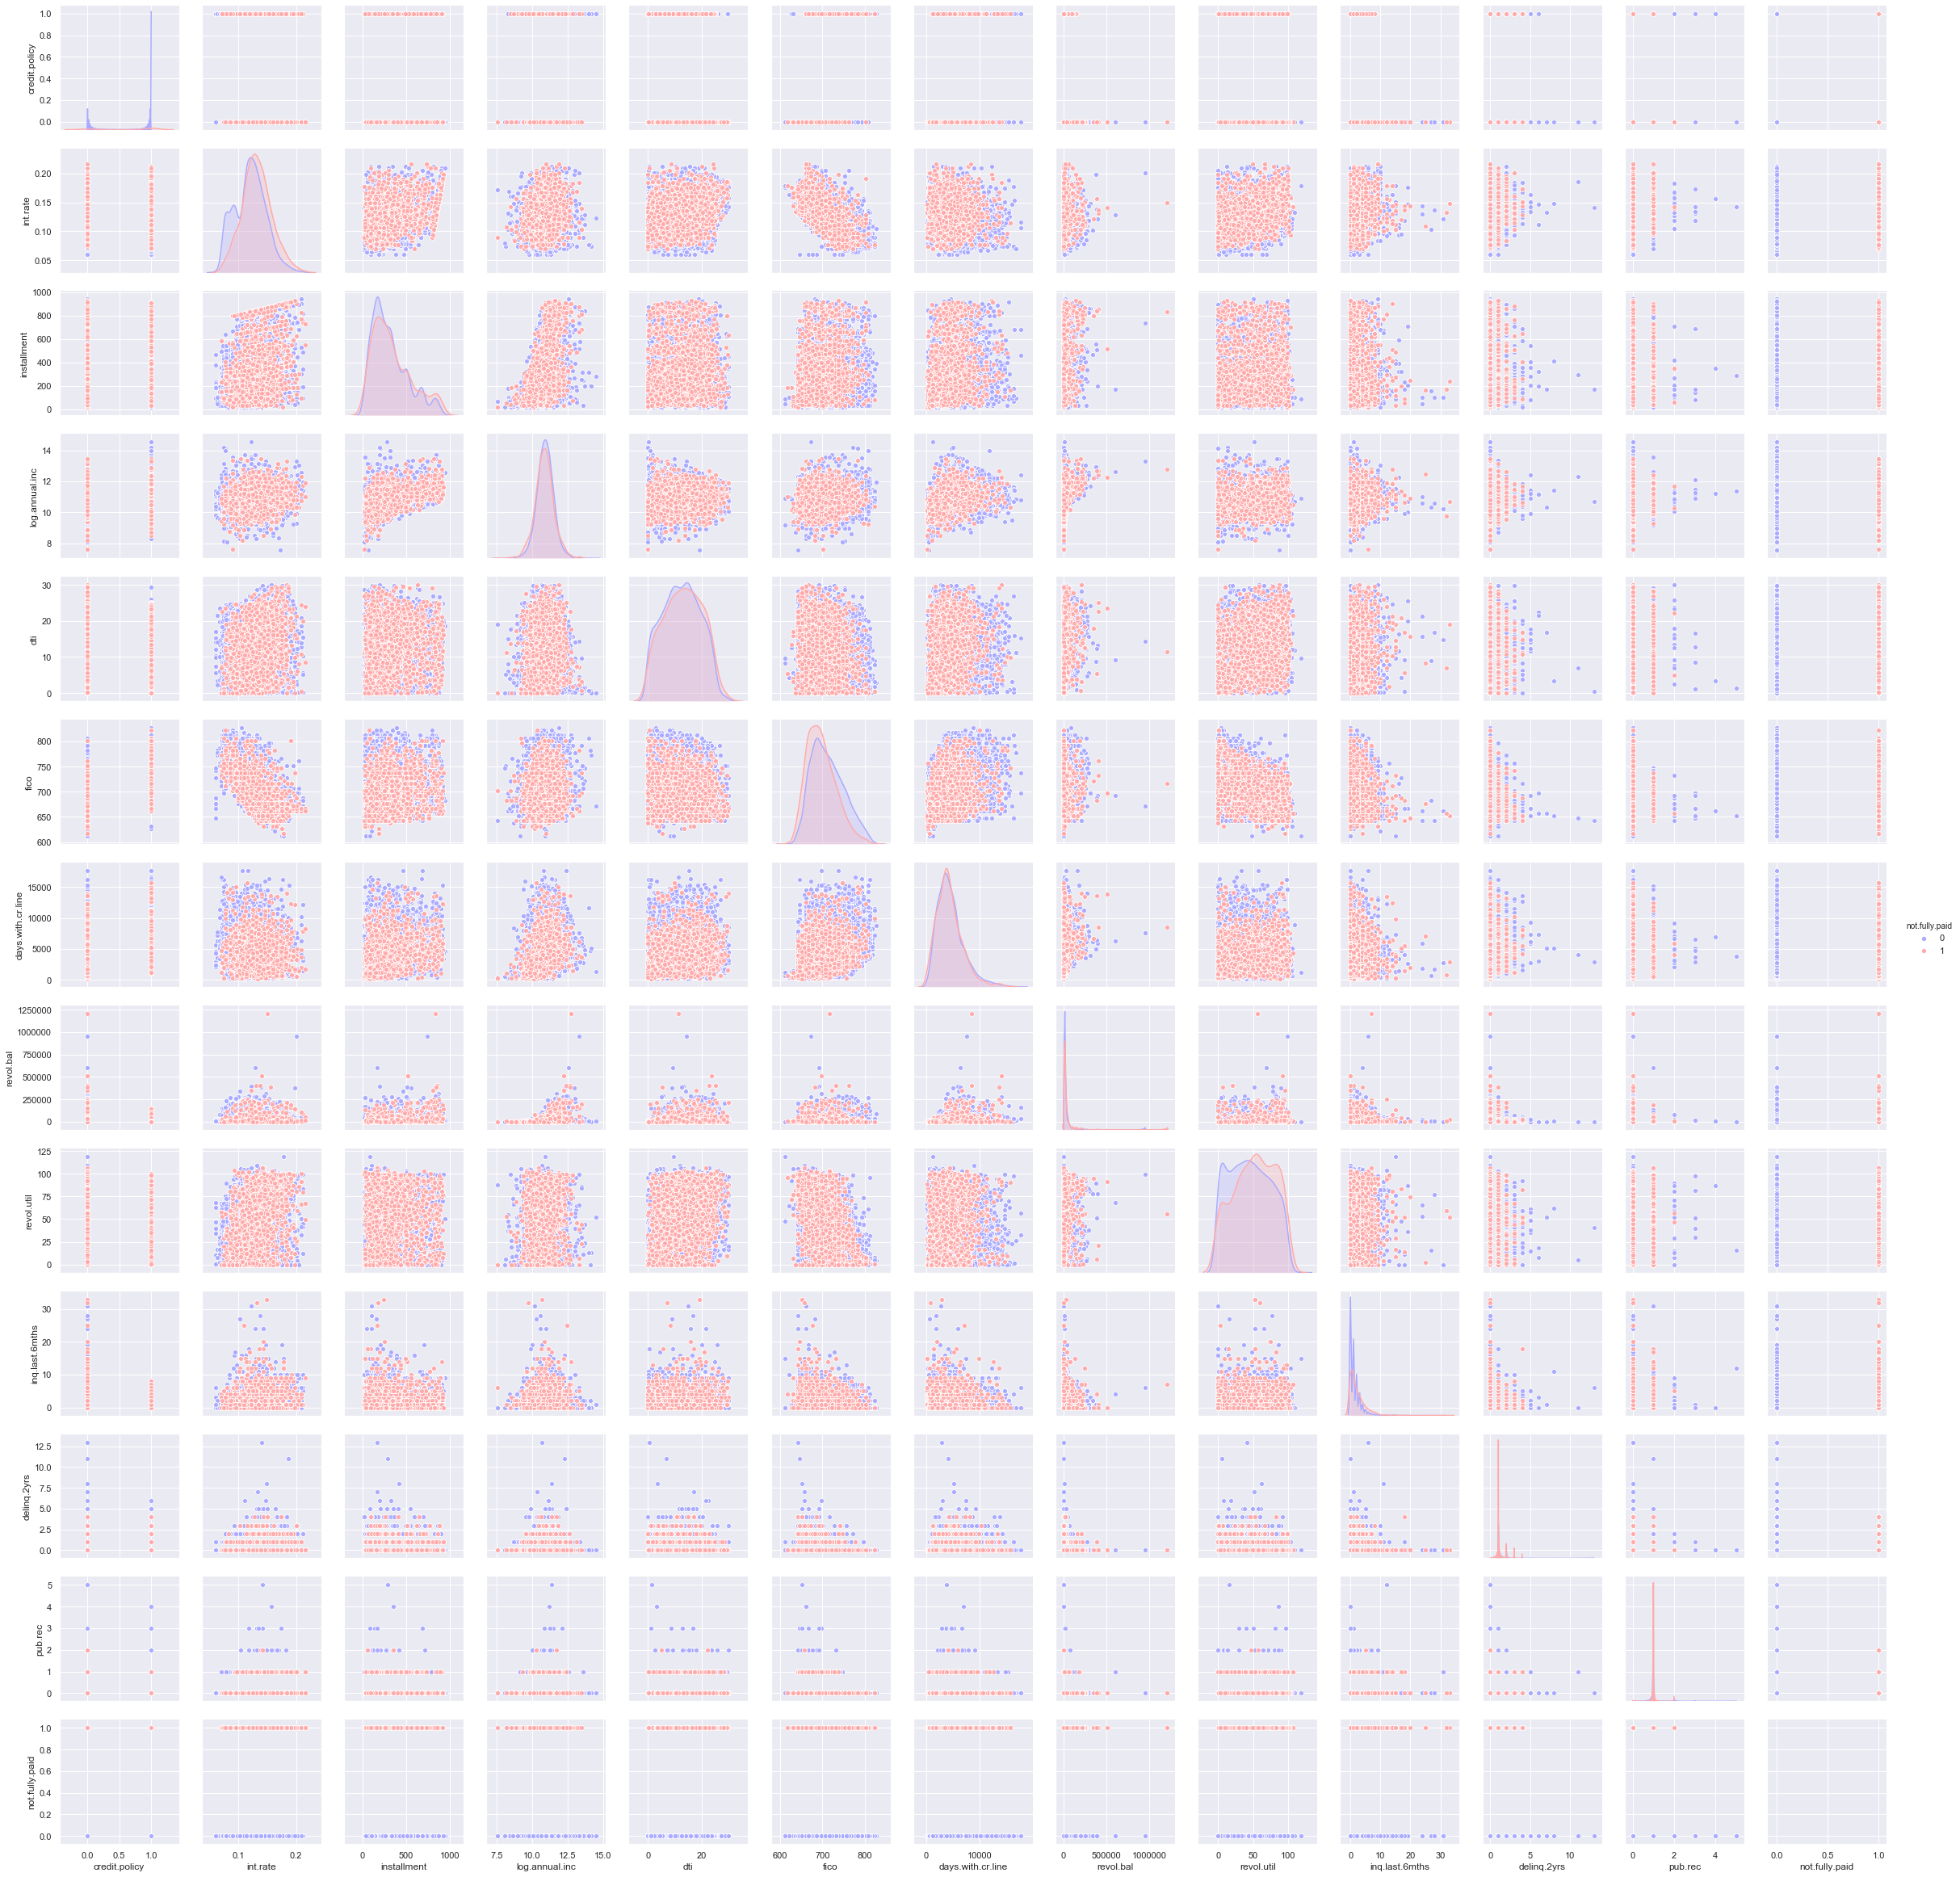

In [73]:
sns.pairplot(df, hue='not.fully.paid', palette='bwr')

Pairplot to quickly observe any other linear trends in case we want to do some prediction (instead of classification).

This gives a sufficient overview of our dataset. We can start training our ML models now. 

## Set up data for trianing ML algorithm

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


Note that the 'purpose' column is a categorical variable. Let's split up this column into dummy variables and add them to the dataframe. Note that we should drop one of the categories, to avoid multicollinearity. 

In [80]:
df_final = pd.get_dummies(df, columns=['purpose'], drop_first=True)

In [86]:
# Train test split
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

X = df_final.drop('not.fully.paid', axis=1)
y = df_final['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Decision Tree model

In [89]:
# Train a decision tree
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

# Make predictions
pred_dtree = dtree.predict(X_test)

# Evaluate model
print(classification_report(y_test,pred_dtree))
print(confusion_matrix(y_test,pred_dtree))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1611
           1       0.21      0.24      0.22       305

    accuracy                           0.74      1916
   macro avg       0.53      0.53      0.53      1916
weighted avg       0.75      0.74      0.74      1916

[[1338  273]
 [ 233   72]]


## Random Forest model

In [90]:
# Train a random forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Make predictions
pred_rf = rf.predict(X_test)

#Evaluate model
print(classification_report(y_test,pred_rf))
print(confusion_matrix(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.84      0.98      0.91      1611
           1       0.34      0.05      0.08       305

    accuracy                           0.83      1916
   macro avg       0.59      0.51      0.49      1916
weighted avg       0.76      0.83      0.78      1916

[[1584   27]
 [ 291   14]]


C:\Users\sriha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## Compare Models

The question now is, which model performed better. The answer is, it really depends on what we are looking for. Neither model performed particularly well, but the single decision tree had a better F1 score for predicting who defaulted on loan payments, even though on average, the random forest 'appears' to perform better. This model can be further improved and I may revisit this project in the future. 